# Convolutional Networks

Let's start off by importing some packages we'll need.

In [1]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
from tqdm import tqdm
import torch
from torch.utils.data import TensorDataset, DataLoader

C:\Users\qraus\anaconda3\envs\deep_learning\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 1D Convolution Tests

* *Create some random data of size (B, C, H) where B is a batch dimension, C is number of channels (start with 1) and H is height.*
* *Create a 1D convolution layer `L` using `torch.nn.Conv1d`, with a 3-element filter. Start off with 1 input and output.*
* *Inspect the free parameters of your layer using its `.weight` and `.bias` fields.*
* *How many dimensions does `L.weight` have, and what do they all represent?*
* *Set the bias and weights to all be zero. Set one weight to be 2. Apply your convolution layer to an input tensor and describe what happens.*
* *How many dimensions did your input tensor need to have, and what does each represent?*

* *Create some random data of size (B, C, H) where B is a batch dimension, C is number of channels (start with 1) and H is height.*

In [14]:
B = 5
C = 1
H = 5

data = torch.rand((B,C,H))

* *Create a 1D convolution layer `L` using `torch.nn.Conv1d`, with a 3-element filter. Start off with 1 input and output.*

In [10]:
L = torch.nn.Conv1d(C,1,3) # input channels, output channels, kernel/filter size

* *Inspect the free parameters of your layer using its `.weight` and `.bias` fields.*

In [11]:
print("Weights:")
print(L.weight)
print(L.weight.shape)

Weights:
Parameter containing:
tensor([[[0.1620, 0.1141, 0.5432]]], requires_grad=True)
torch.Size([1, 1, 3])


In [12]:
print("Biases:")
print(L.bias)
print(L.bias.shape)

Biases:
Parameter containing:
tensor([-0.2905], requires_grad=True)
torch.Size([1])


* *How many dimensions does `L.weight` have, and what do they all represent?*

`L.weight` has three dimensions with size (1,1,3). \
The first dimension corresponds to the number of output channels, the second one with the number of input channels and the last one with the kernel size.

* *Set the bias and weights to all be zero. Set one weight to be 2. Apply your convolution layer to an input tensor and describe what happens.*

In [13]:
L.weight.data = torch.zeros(L.weight.shape)
L.bias.data = torch.zeros(L.bias.shape)

L.weight.data[0,0,1] = torch.tensor([2.0])
print(L.weight)


Parameter containing:
tensor([[[0., 2., 0.]]], requires_grad=True)


In [17]:
L(data)

tensor([[[0.4339, 0.6916, 1.4592]],

        [[0.3657, 1.9001, 1.9189]],

        [[0.4814, 0.0838, 0.3248]],

        [[0.0664, 1.2640, 0.5507]],

        [[0.2258, 1.1081, 0.9187]]], grad_fn=<ConvolutionBackward0>)

**!!---------------------------------------------------------------------------------------------------------------------------------!!** \
The 5x1x5 input data gets reduced to 5x1x3 output data.

* *How many dimensions did your input tensor need to have, and what does each represent?*

The input tensor needs three dimensions. The first one is the batch dimension, the second for the channels and has to be of same size as the input channels from the convolution layer. Lastly, the third dimension ist thee height of our data point and needs to be equal or larger than kernel size (for padding=0).

* *Create and test a convolution with multiple input and output channels.*

In [8]:
data2 = torch.rand(5,3,5)
L2 = torch.nn.Conv1d(3,3,3)
print(L2(data2))

tensor([[[ 0.3299,  0.3068,  0.2477],
         [-0.5117, -0.8039, -1.0170],
         [ 0.0244,  0.2951,  0.2435]],

        [[ 0.1808,  0.1550,  0.2062],
         [-0.5299, -0.4068, -0.3508],
         [-0.3224, -0.2866, -0.0626]],

        [[-0.0283,  0.3365,  0.3131],
         [-0.9897, -0.9341, -0.6521],
         [ 0.3293,  0.2353,  0.3683]],

        [[ 0.4315,  0.2690,  0.1922],
         [-0.8779, -0.8248, -0.6867],
         [ 0.3537,  0.4840,  0.3403]],

        [[ 0.0928,  0.3787,  0.0751],
         [-0.5169, -0.9054, -0.8667],
         [-0.0422,  0.0969,  0.3700]]], grad_fn=<ConvolutionBackward0>)


## 2D Convolution

* *Repeat the previous problem, but now for random input data of size (B, C, H, W) and a `torch.nn.Conv2d` layer with a 3x3 filter.*
* *Go up to at least 2 inputs and outputs. What does each dimension of `L.weight` and `L.bias` mean now?*

In [19]:
B = 5
C = 2
H = 5
W = 5
data_2D = torch.rand(B,C,H,W)

L_2D = torch.nn.Conv2d(2,2,(3,3))
out_2D = L_2D(data_2D)
print("weights:",L_2D.weight) #shape output, input, filter
print("biases :",L_2D.bias) # shape of output channels


weights: Parameter containing:
tensor([[[[-0.2259,  0.0870, -0.0540],
          [-0.0846, -0.1752, -0.0499],
          [ 0.1030,  0.0204, -0.1426]],

         [[ 0.1510,  0.1379, -0.0265],
          [-0.0855, -0.1480, -0.0938],
          [-0.1740, -0.1868,  0.0902]]],


        [[[-0.2151, -0.1753,  0.1846],
          [-0.1466,  0.1204,  0.0514],
          [-0.1237, -0.0196, -0.1958]],

         [[ 0.0721, -0.1315,  0.1832],
          [-0.2326,  0.2166, -0.0689],
          [-0.1112, -0.0086, -0.1205]]]], requires_grad=True)
biases : Parameter containing:
tensor([ 0.2006, -0.0037], requires_grad=True)


**!!---------------------------------------------------------------------------------------------------------------------------------!!**

* *Experiment with different modes for the `padding` argument to the Conv2d class. See the documentation [here](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html).*

In [12]:
L_2D = torch.nn.Conv2d(2,2,(3,3),padding=2)
L_2D(data_2D)
print(L_2D.weight) #shape output, input, filter
print(L_2D.bias) # shape of output channels

Parameter containing:
tensor([[[[-0.1765,  0.1623, -0.2244],
          [ 0.0821,  0.0790,  0.2139],
          [ 0.0143, -0.1144,  0.0982]],

         [[ 0.1573, -0.1210, -0.0062],
          [ 0.1600, -0.2247,  0.0555],
          [-0.0356, -0.1370,  0.0906]]],


        [[[ 0.2080,  0.2296, -0.0496],
          [-0.1114,  0.2300,  0.1707],
          [-0.1950, -0.1411,  0.0168]],

         [[-0.0510,  0.0268, -0.1567],
          [-0.1820,  0.0838, -0.0304],
          [-0.0394, -0.2046,  0.1133]]]], requires_grad=True)
Parameter containing:
tensor([0.2030, 0.1676], requires_grad=True)


In [14]:
L_2d = torch.nn.Conv2d(1,5,(7,3), padding=2)
L_2d(torch.rand((4,1,4,1))) ##channels has to be the same size -> first argument of Conv2d and 2nd of input has to be the same

tensor([[[[ 0.0978,  0.0023,  0.2088],
          [-0.1285, -0.1027,  0.3782]],

         [[-0.3139, -0.2280, -0.4354],
          [-0.3096, -0.2045, -0.5880]],

         [[-0.0614, -0.1981, -0.0240],
          [-0.2034, -0.2412, -0.0250]],

         [[ 0.4532,  0.1608,  0.1507],
          [ 0.4251,  0.0396,  0.0650]],

         [[ 0.2487, -0.0328,  0.1829],
          [ 0.2567,  0.1777,  0.1154]]],


        [[[ 0.1088,  0.0122,  0.1770],
          [-0.0776, -0.0603,  0.3077]],

         [[-0.3558, -0.2218, -0.3924],
          [-0.2834, -0.2427, -0.5192]],

         [[-0.1149, -0.1892, -0.0749],
          [-0.1554, -0.2094,  0.0059]],

         [[ 0.4536,  0.1109,  0.1444],
          [ 0.3722,  0.0932,  0.1297]],

         [[ 0.1946, -0.0095,  0.1563],
          [ 0.2333,  0.1188,  0.1011]]],


        [[[ 0.1939,  0.0026,  0.1148],
          [-0.1170, -0.0138,  0.2669]],

         [[-0.2889, -0.1473, -0.3287],
          [-0.3223, -0.2947, -0.4380]],

         [[-0.1786, -0.2512, -0.1914

## Pooling Layer Tests

* *Create and test a `torch.nn.MaxPool2d` layer. Try several window sizes.*
* *Do the same for a `torch.nn.AvgPool2d` layer.*

In [45]:
def plot_pool(before,after,title,title_before="data",title_after="max pool"):
    plt.figure(figsize=(4*2,3.5),tight_layout=True)
    plt.subplot(121)
    plt.imshow(before,vmin=0,vmax=1)
    plt.title(title_before)
    plt.subplot(122)
    plt.imshow(after,vmin=0,vmax=1)
    plt.title(title_after)
    plt.colorbar()
    plt.suptitle(title)

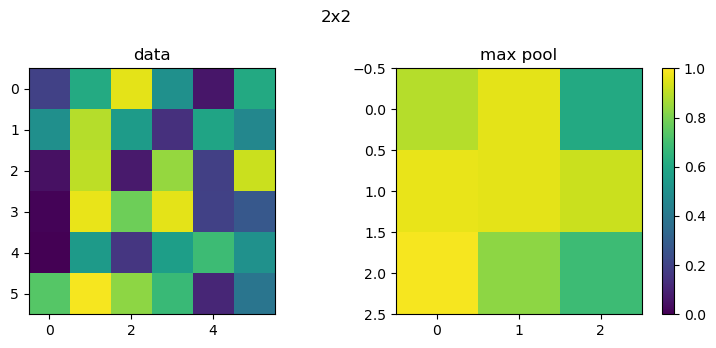

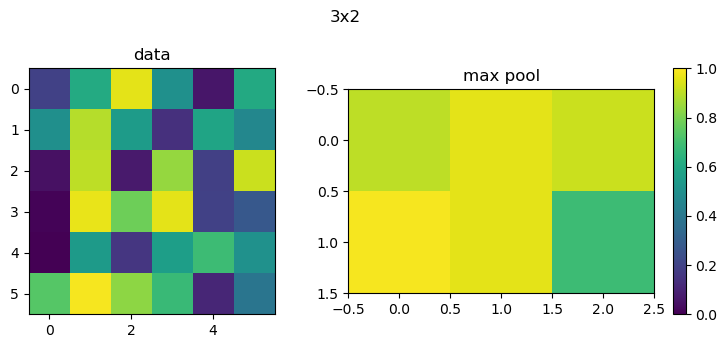

In [49]:
B = 6
C = 1
H = 6
W = 6
data_2D = torch.rand(B,C,H,W)
MPL = torch.nn.MaxPool2d((2,2))
MPL2 = torch.nn.MaxPool2d((3,2))

plot_pool(data_2D[0,0,:,:],MPL(data_2D)[0,0,:,:],"2x2")
plot_pool(data_2D[0,0,:,:],MPL2(data_2D)[0,0,:,:],"3x2")

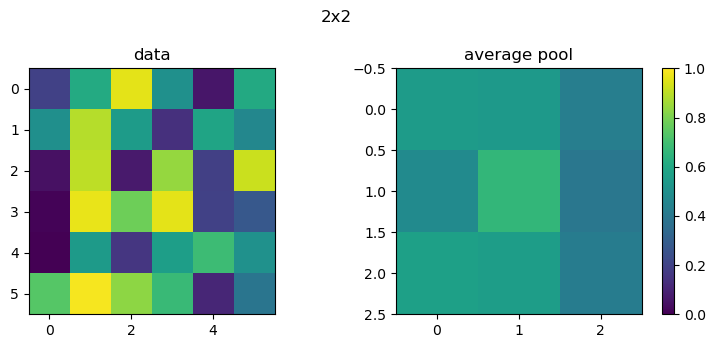

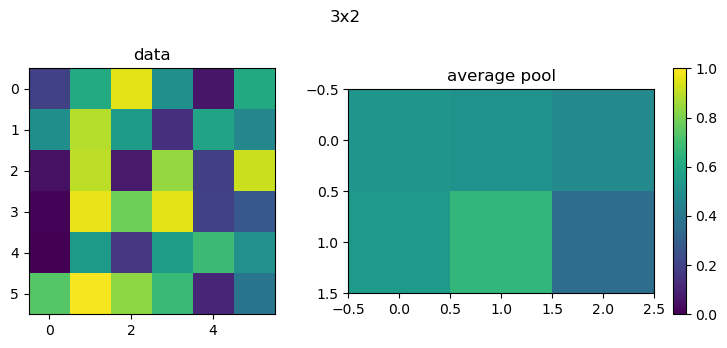

In [51]:
APL = torch.nn.AvgPool2d((2,2))
APL2 = torch.nn.AvgPool2d((3,2))

plot_pool(data_2D[0,0,:,:],APL(data_2D)[0,0,:,:],"2x2",title_after="average pool")
plot_pool(data_2D[0,0,:,:],APL2(data_2D)[0,0,:,:],"3x2",title_after="average pool")

## Tanh(x) vs ReLU(x)

*Try out the hyperbolic tangent function `torch.tanh`:*
* *Plot its output as a function of its input in increments of 0.01 from -10 to 10*
* *Plot the ReLU function on the same graph for comparison.*
* *Can you speculate as to when one or the other activation function might be preferable?*

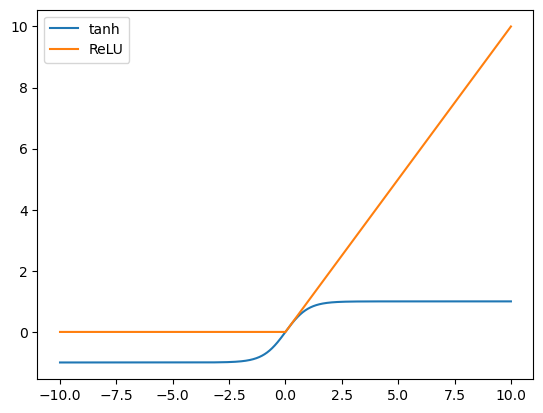

In [20]:
x = torch.arange(-10,10.01,0.01)
plt.plot(x,torch.tanh(x),label="tanh")
plt.plot(x,torch.nn.functional.relu(x),label="ReLU")
plt.legend()

**!!---------------------------------------------------------------------------------------------------------------------------------!!**

# Load Data

Download the sea surface temperature and upper ocean heat content fields for ENSO prediction. If you like, you can add these files to your google drive or local filesystem in the same place as your copy of this notebook, so that you won't have to install gdown and download them in the future whenever you restart this notebook.

In [ ]:
# ! executes shell commands instead of python commands

# library for downloading files from google drive.
#!pip install gdown

In [ ]:
# enso index data from previous exercises
!gdown https://drive.google.com/uc?id=1FUb-2lcAd0Y1ULjx5jB6UTMNDmGy3vZA 
    
# sea surface temperature and upper ocean heat content
!gdown https://drive.google.com/uc?id=1TUFl4l4iEyIKTY1UnRD3G7fKElNMXjwo
!gdown https://drive.google.com/uc?id=1PkDoopBJdYdiVt_clxnbDfuDGJGM0QSY

Download the non-PCA data for ENSO prediction

Now load the sea surface temperature data (`sst.nc`) using xarray.

In [52]:
import xarray as xr
sst = xr.open_dataset("./data/sst.nc",decode_times=False)

Convert the sea surface temperatures to a tensor with 32 bit floating point data. 

In [53]:
sst_t = torch.tensor(sst.temp.values,dtype=torch.float32)

Load the target ENSO index data.

In [54]:
# load the data
with np.load('./data/enso_and_pca.npz') as data:    
    enso_index = data['y']  # 3-month-moving-averaged Nino3.4 index
    t_enso = data['t']  # months since jan. 1 1960 for the center of each 3-month window

The ENSO index is a 3-month moving average, and we'll try to predict it from temperature fields of of the ocean 3 months before the center of the window. That means we have to throw out
* The first few enso_index values, since we don't have ocean temperature fields 3 months earlier
* The last few temperature fields, since we don't have enso_index values 3 months later

Construct PyTorch tensors x and y for the temperature field in `sst` and the enso_index, so that `x[i]` was measured 3 months earlier than `y[i]`. Use as much of the data as you can, while dealing with the above-mentioned edge cases. To figure out the timing, compare `t_enso` and `sst.time`. Make sure `x` and `y` have a dtype of 32 bit floating point!

In [55]:
x = sst_t[:-4]
y = torch.tensor(enso_index[1:],dtype=torch.float32)
print(x.shape,y.shape)
print(x.dtype,y.dtype)

torch.Size([1232, 23, 72]) torch.Size([1232])
torch.float32 torch.float32


In [56]:
print(t_enso[1:])
print(sst.time.values[:-4])

[-1064.5 -1063.5 -1062.5 ...   164.5   165.5   166.5]
[-1067.5 -1066.5 -1065.5 ...   161.5   162.5   163.5]


Normalize `x` and `y` to have a mean of zero and a standard deviation of 1. Don't normalize `x` separately for each location.

In [57]:
x_norm = (x - torch.mean(x)) / torch.std(x)
y_norm = (y - torch.mean(y))/ torch.std(y)
print(x_norm.shape,y_norm.shape)
print(torch.mean(x_norm),torch.mean(y_norm))
print(torch.std(x_norm),torch.std(y_norm))

torch.Size([1232, 23, 72]) torch.Size([1232])
tensor(-1.8189e-08) tensor(-4.2575e-09)
tensor(1.) tensor(1.0000)


To use 2d convolutions, we need to have a channel dimension for our input tensor, which should be of size `(n_batch, n_channels, n_rows, n_columns)`. Use `reshape` or `unsqueeze` to add a channel axis of size 1 to `x`. It should be in position one, after the batch axis (position 0) but before the spatial dimensions.

Similarly, change `y` to have a second dimension of size 1, so that it has two dimensions total. This way it will match the output coming from out network.

In [58]:
x_norm1 = torch.unsqueeze(x_norm,1)
print(x_norm1.shape)
y_norm1 = torch.unsqueeze(y_norm,1)
print(y_norm1.shape)

torch.Size([1232, 1, 23, 72])
torch.Size([1232, 1])


Now create a TensorDataset and a dataloader from these tensors, just as we did in last week's exercises. Following Ham et al., we'll use a batch size of 400.

We won't split training and testing data this time so we can focus on what's new, but keep in mind this is normally the right practice.

In [63]:
dataset = TensorDataset(x_norm1, y_norm1)  # combine the inputs and outputs into a PyTorch Dataset object
# create a dataloader to serve up batches of 400 data point for training
data_loader = DataLoader(dataset, batch_size=100, shuffle=True)

Create a class defining your convolutional network.

Add code to the `__init__` method to define the layers, and add code to the `forward` method to use them.
* Start with a convolution with 30 output channels, and 'same' padding so that the image width and height are the same in the input and output. Use filters with a height of 4 and width of 8.
* Then use a `tanh` nonlinearity
* Next use a 2x2 maxpooling layer
* Then another convolution with 30 outputs, filter height 2 and filter width 4.
* Next another `tanh`
* Now another 2x2 maxpooling layer
* A third convolution with 30 outputs, filter height 2 and filter width 4
* Now reshape the output so the batch dimension is unchanged, but all other dimensions are combined into one.
* Now use a fully connected layer with 30 outputs
* Now a `tanh`
* Now a second fully connected layer with 1 output: that's  our $\hat y$, which our forward method should return!

In [60]:
# build the convnet from the paper
class ConvNet(torch.nn.Module):
    def __init__(self, input_channels=1, hidden_channels=30, hidden_units=30, n_outputs=1):
        super(ConvNet, self).__init__()

        self.first_conv  = torch.nn.Conv2d(input_channels,hidden_channels,(4,8),padding='same')
        self.second_conv = torch.nn.Conv2d(hidden_channels,hidden_channels,(2,4),padding='same')
        self.third_conv  = torch.nn.Conv2d(hidden_channels,hidden_channels,(2,4),padding='same')
        self.first_pool  = torch.nn.MaxPool2d((2,2))
        self.second_pool = torch.nn.MaxPool2d((2,2))
        self.first_FC    = torch.nn.Linear(hidden_channels * 5 * 18, hidden_units)
        self.second_FC   = torch.nn.Linear(hidden_units, n_outputs)
        
    def forward(self, x):
        x = self.first_conv(x)
        x = torch.tanh(x)
        x = self.first_pool(x)
        x = self.second_conv(x)
        x = torch.tanh(x)
        x = self.second_pool(x)
        x = self.third_conv(x)
        x = torch.tanh(x)
        x = x.reshape(-1,30 * 5 * 18)
        x = self.first_FC(x)
        x = torch.tanh(x)
        x = self.second_FC(x)

        return x

Create an instance of your network class.

Pass a single batch of data through the network, and check that everything makes sense.

In [61]:
conv = ConvNet()
for x_batch, y_batch in data_loader:
    test_x_batch = x_batch
    test_y_batch = y_batch
    break

test_out = conv(test_x_batch)    
print(test_out.shape)


torch.Size([400, 1])


C:\Users\qraus\anaconda3\envs\deep_learning\lib\site-packages\torch\nn\modules\conv.py:453: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  C:\b\abs_f0dma8qm3d\croot\pytorch_1669187301762\work\aten\src\ATen\native\Convolution.cpp:883.)
  return F.conv2d(input, weight, bias, self.stride,


How many free parameters does your network have?

In [62]:
FC_2 = 30*5*18*30 
FC_1 = 30 * 1
conv_1   = 1 * 30 * 4 * 8 
conv_2_3 = 2*(30*30*2*4)

print(f"Number of free parameters: {FC_2 + FC_1 + conv_1 + conv_2_3}")

Number of free parameters: 96390


Write a training loop.

To avoid having to loop over trainable parameters, we'll use the optimizer class. We tell it once which parameters to update and what the learning rate is, then we can simply call `optimizer.step()` after calling `loss.backward()`, and all the parameters will be updated appropriately.

**Important**: For the optimizer to work properly each convolutional or fully connected layer must be an attribute of your `net.object`, for example by calling `self.layer = torch.nn.Conv2d(...)` in your network's `__init__` method. If you want to use a list instead that's ok, but in that case include `self.layers_list = torch.nn.ModuleList(layers_list)` to make sure that the optimizer finds the parameters of these layers.

Train your network over 100 epochs with a learning rate of 0.001. Keep track of the loss values and plot them at the end

**Optional**: if you want training to go more quickly, use a GPU instance. Generally you'll get it for 12 hours, and it will disconnect if it goes idle for an hour.
* In the colab menu, go to Runtime -> Change runtime type -> Hardware accelerator -> GPU and restart the colab notebook.
* Use `print(torch.cuda.get_device_name(0))` to figure out what kind of GPU you have
* Define `device = torch.device('cuda:0')`
* Call `net = net.to(device)` and `x = x.to(device)` and `y = y.to(device)`. Create a new Dataset and Dataloader, and start training


In [64]:
conv = ConvNet()
n_epochs = 100
learning_rate = 0.01  # adjust this if necessary

lossfunc = torch.nn.MSELoss()
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(conv.parameters(), lr=learning_rate)
Loss     = []

for epoch in tqdm(range(n_epochs)):
    for batch_index, batch in enumerate(data_loader):
        # note that each time this loop is run through, the order of the data is randomly permuted!
        x_batch, y_batch = batch
        optimizer.zero_grad()

        yhat_batch = conv(x_batch)
        loss = lossfunc(y_batch,yhat_batch)
        Loss.append(loss.detach().numpy())
        
        loss.backward()
        torch.no_grad()
        optimizer.step()  # this will update parameters using torch.no_grad()
        #optimzer.zero_grad()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:10<00:00,  1.30s/it]


Text(0.5, 1.0, 'Loss')

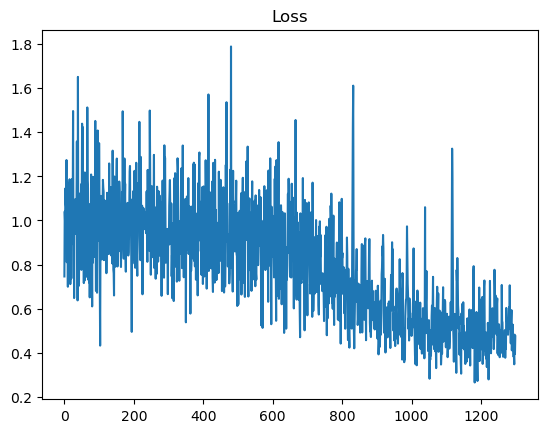

In [75]:
plt.plot(Loss) # I changed the batch size down to 100. Converges at least visually better and also produces yhat with larger correlations
plt.title("Loss")

Plot the predictions $\hat y$ against the targets $y$.

Text(0, 0.5, 'y')

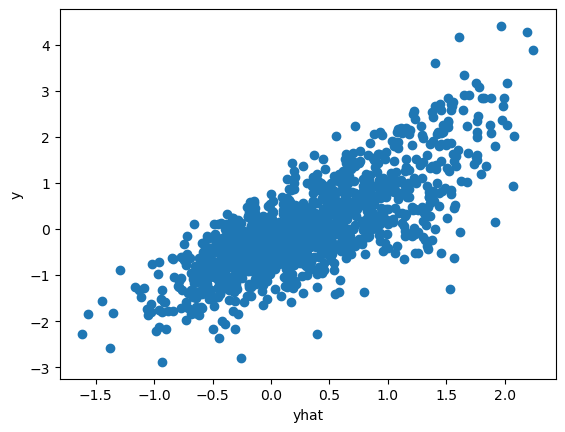

In [67]:
yhat = conv(x_norm1).detach().numpy()
plt.scatter(yhat,y_norm1.detach().numpy())
plt.xlabel("yhat")
plt.ylabel("y")

Calculate the Pearson's correlation between your prediction and the target over the training data.

In [87]:
np.corrcoef(np.squeeze(yhat),np.squeeze(y_norm1.detach().numpy()))

array([[1.        , 0.78856481],
       [0.78856481, 1.        ]])

Load `hc.nc`, containing heat content of the upper ocean, and use it as a second input channel to the network. Does this improve performance on the training data?

In [68]:
hc = xr.open_dataset("./data/hc.nc", decode_times=False)
hc_tensor = torch.tensor(hc.temp.data, dtype=torch.float32)

torch.float32

In [69]:
z = hc_tensor[:-4]
z_norm = (z - torch.mean(z)) / torch.std(z)

# stack sst and hc
x_z = torch.stack((x_norm, z_norm), axis = 1)
x_z.shape


torch.Size([1232, 2, 23, 72])

In [71]:
dataset2 = TensorDataset(x_z, y_norm1)  # combine the inputs and outputs into a PyTorch Dataset object
data_loader2 = DataLoader(dataset2, batch_size=100, shuffle=True)

In [72]:
conv2 = ConvNet(input_channels=2)
for x_batch, y_batch in data_loader2:
    test_x_batch = x_batch
    test_y_batch = y_batch
    break

test_out = conv2(test_x_batch)    
print(test_out.shape)

torch.Size([100, 1])


In [73]:
conv2 = ConvNet(input_channels=2)
n_epochs = 100
learning_rate = 0.01  # adjust this if necessary

lossfunc = torch.nn.MSELoss()
#optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)
optimizer = torch.optim.SGD(conv2.parameters(), lr=learning_rate)
Loss2     = []

for epoch in tqdm(range(n_epochs)):
    for batch_index, batch in enumerate(data_loader2):
        # note that each time this loop is run through, the order of the data is randomly permuted!
        x_batch, y_batch = batch
        optimizer.zero_grad()

        yhat_batch = conv2(x_batch)
        loss = lossfunc(y_batch,yhat_batch)
        Loss2.append(loss.detach().numpy())
        
        loss.backward()
        torch.no_grad()
        optimizer.step()  # this will update parameters using torch.no_grad()
        #optimzer.zero_grad()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:09<00:00,  1.30s/it]


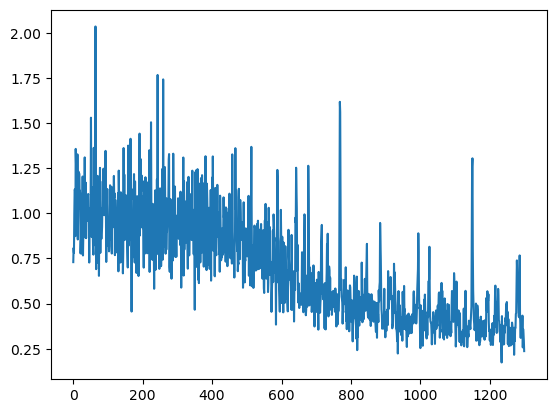

In [74]:
plt.plot(Loss2)
plt.title("Loss")

In [91]:
yhat2 = conv2(x_z).detach().numpy()

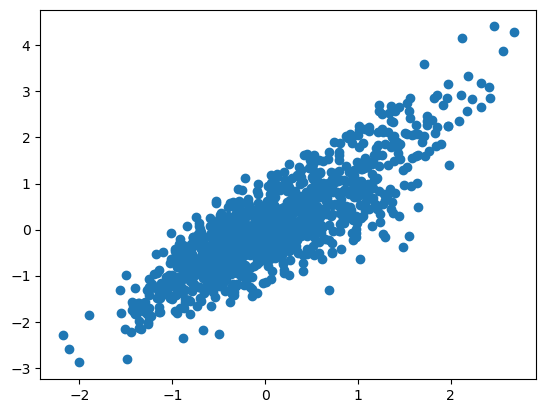

In [92]:
plt.scatter(yhat2,y_norm1.detach().numpy())
plt.xlabel("yhat")
plt.ylabel("y")

In [93]:
np.corrcoef(np.squeeze(yhat2),np.squeeze(y_norm1.detach().numpy()))

array([[1.        , 0.84285948],
       [0.84285948, 1.        ]])

performance was worse with 400 and difference between one and two channels also smaller (~3%)

**Optional** Include two previous time steps as input for a total of 6 input channels.

In this case, we were able to load all of the training data into memory and store it in pytorch tensors. What if the training data were too big to fit into memory all at once? What could we do then? Propose a potential solution to this problem, and describe in words (or if you like, code) roughly how it would work.